# 📈 **Linear Regression**

# 📤 Import & Install Libraries

In [58]:
# Load data libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data preparation
from sklearn.preprocessing import RobustScaler, StandardScaler
from datetime import datetime
import math

# Modeling
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, r2_score, precision_score, recall_score, classification_report, confusion_matrix


## 💾 Check out the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [59]:
ls

drive/  sample_data/


In [60]:
%%time
# %%time в начале ячейки позволит узнать, как долго исполнялся код

# чтение датасета
df = pd.read_csv('sample_data/Real estate.csv', index_col=0)
df.head(2)

CPU times: user 20.7 ms, sys: 0 ns, total: 20.7 ms
Wall time: 20.7 ms


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


*X1 transaction date* - дата совершения сделки

*X2 house age* - возраст дома

*X3 distance to the nearest MRT station* - Расстояние до ближайшей станции метро

*X4 number of convenience stores*	- количество магазинов

*X5 latitude*	и *X6 longitude* - координаты

*Y house price of unit area* - цена за квадрат



In [61]:
df.shape

(414, 7)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [63]:
# Rename the columns (remove X1..X2..X3.. and Y)
df.columns = ['transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [64]:
# Split the data into train and test
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)

In [65]:
print("Train set size:",len(train_data))
print("Test set size:",len(test_data))

Train set size: 331
Test set size: 83


In [66]:
train_data.describe()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2013.169704,17.813595,1052.998068,4.205438,24.969453,121.534048,38.712991
std,0.281697,11.464981,1235.130942,2.926385,0.012370,0.015145,13.814414
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.050000,289.324800,1.000000,24.963050,121.529915,28.450000
50%,2013.167000,16.200000,492.231300,5.000000,24.971100,121.539130,39.300000
75%,2013.417000,29.200000,1410.633500,6.000000,24.978440,121.543480,47.300000
max,2013.583000,42.700000,6488.021000,10.000000,25.014590,121.566270,117.500000


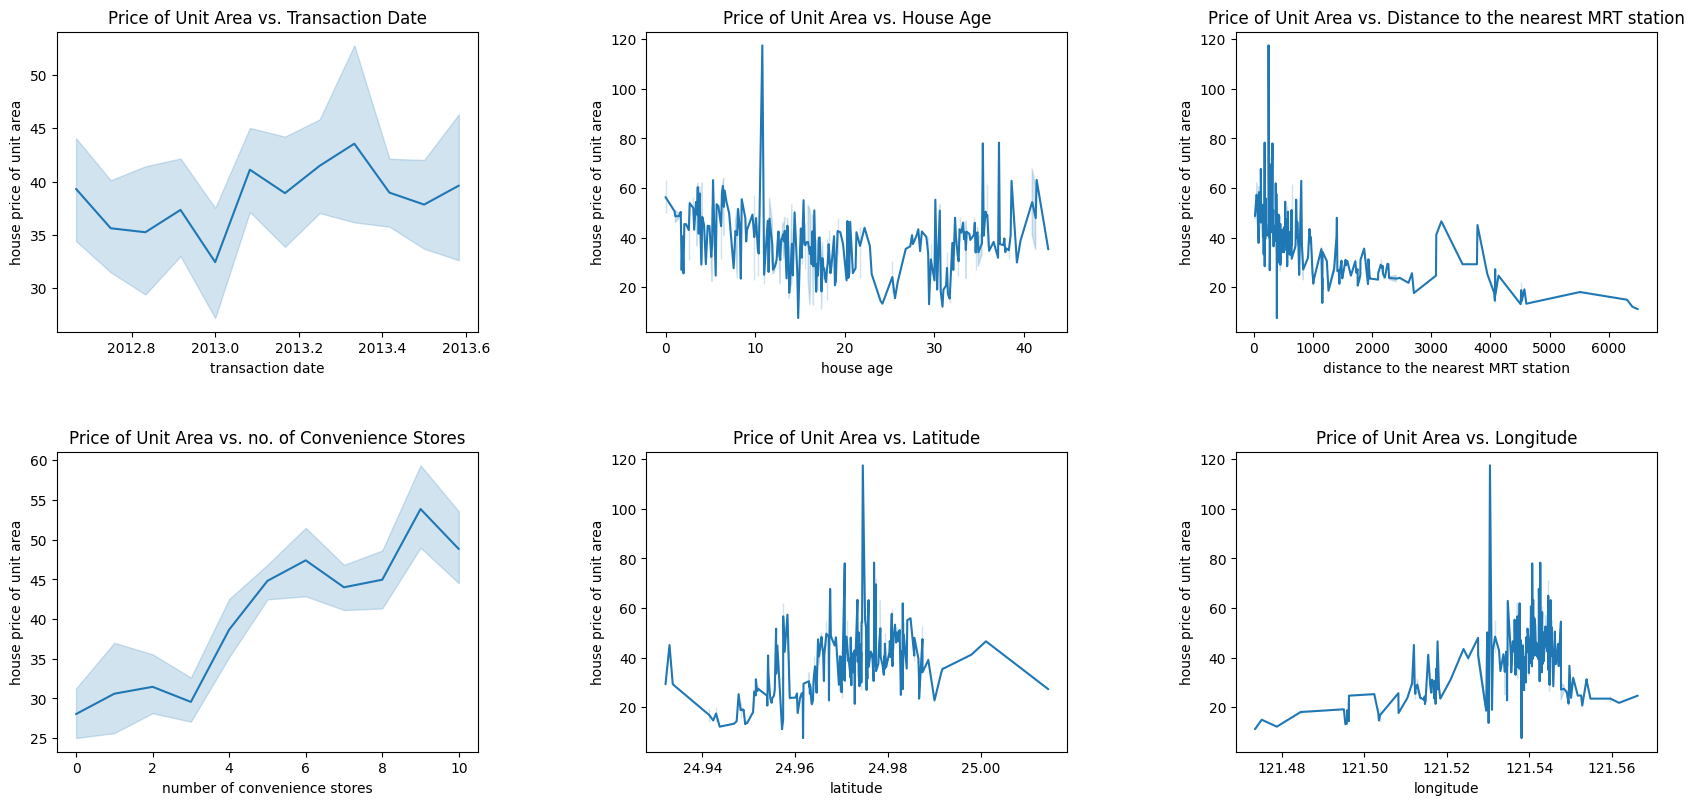

In [10]:
# First let's visualize the features against the price

fig, ax = plt.subplots(2, 3, figsize=(20, 9))
ax = ax.flatten()

sns.set()
sns.lineplot(data=train_data, x="transaction date", y="house price of unit area", ax=ax[0])
ax[0].set_title("Price of Unit Area vs. Transaction Date")

sns.lineplot(data=train_data, x="house age", y="house price of unit area", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. House Age")

sns.lineplot(data=train_data, x="distance to the nearest MRT station", y="house price of unit area", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.lineplot(data=train_data, x="number of convenience stores", y="house price of unit area", ax=ax[3])
ax[3].set_title("Price of Unit Area vs. no. of Convenience Stores")

sns.lineplot(data=train_data, x="latitude", y="house price of unit area", ax=ax[4])
ax[4].set_title("Price of Unit Area vs. Latitude")

sns.lineplot(data=train_data, x="longitude", y="house price of unit area", ax=ax[5])
ax[5].set_title("Price of Unit Area vs. Longitude")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show();

Мы ясно видим, что цена дома за единицу площади пропорциональна количеству магазинов повседневного спроса.

Кроме того, мы видим, что чем ближе дом к ближайшей станции метро, ​​тем выше цена за единицу.

Чем больше магазинов рядом с домом, тем выше цена единицы площади.

Неожиданно возраст дома не пропорционален цене единицы площади, но мы видим закономерность и очевидный выброс.

Можно заметить закономерность в долготе и широте, но нам нужно изучить их подробнее.

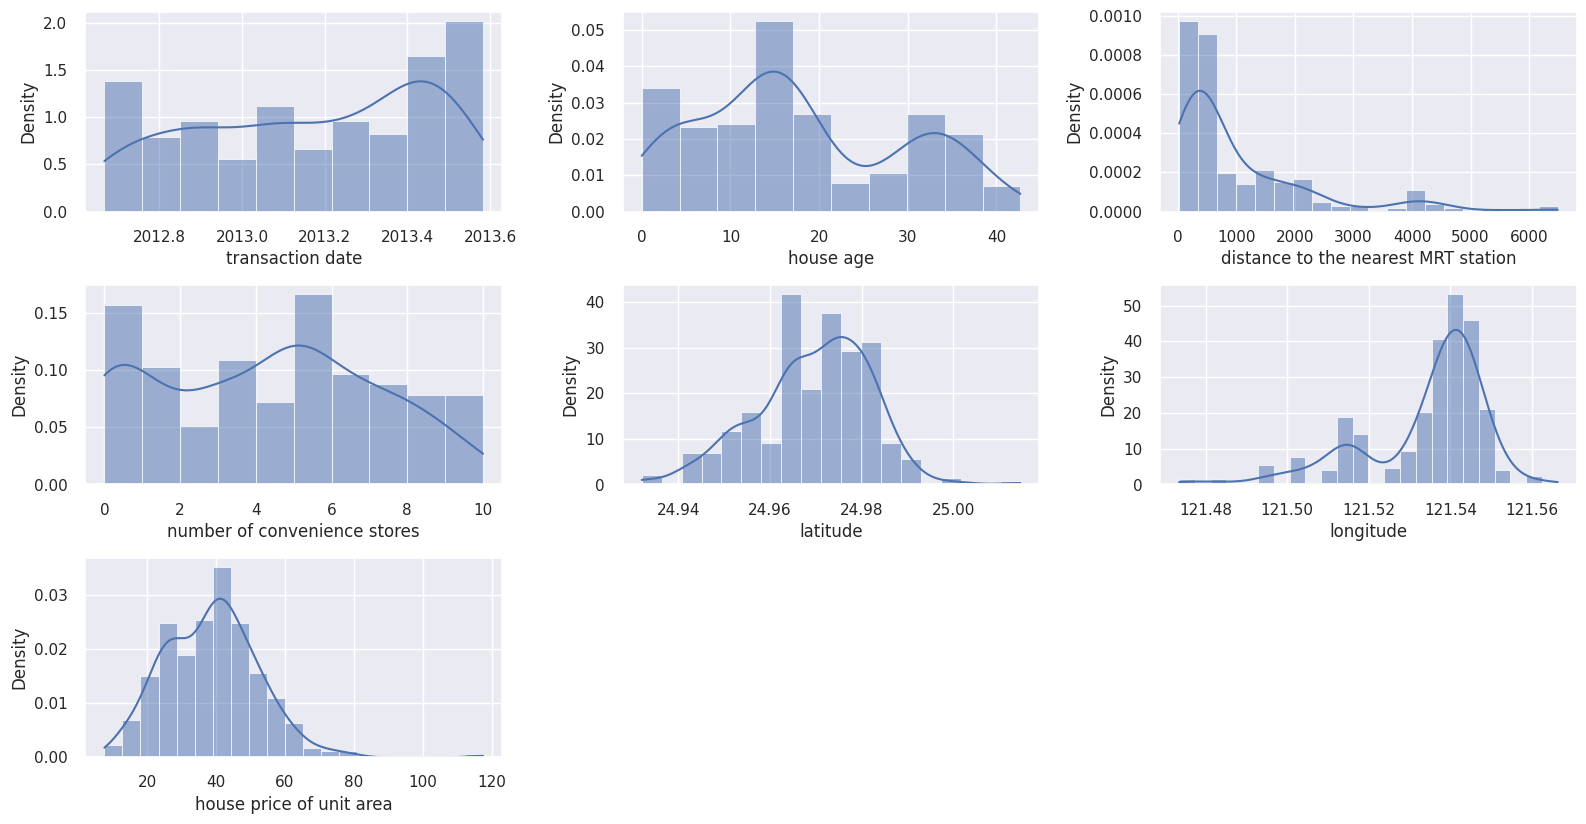

In [144]:
# Let's take a look at the outliers¶
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(train_data):
    plt.subplot(6,3,index+1)
    sns.histplot(train_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);


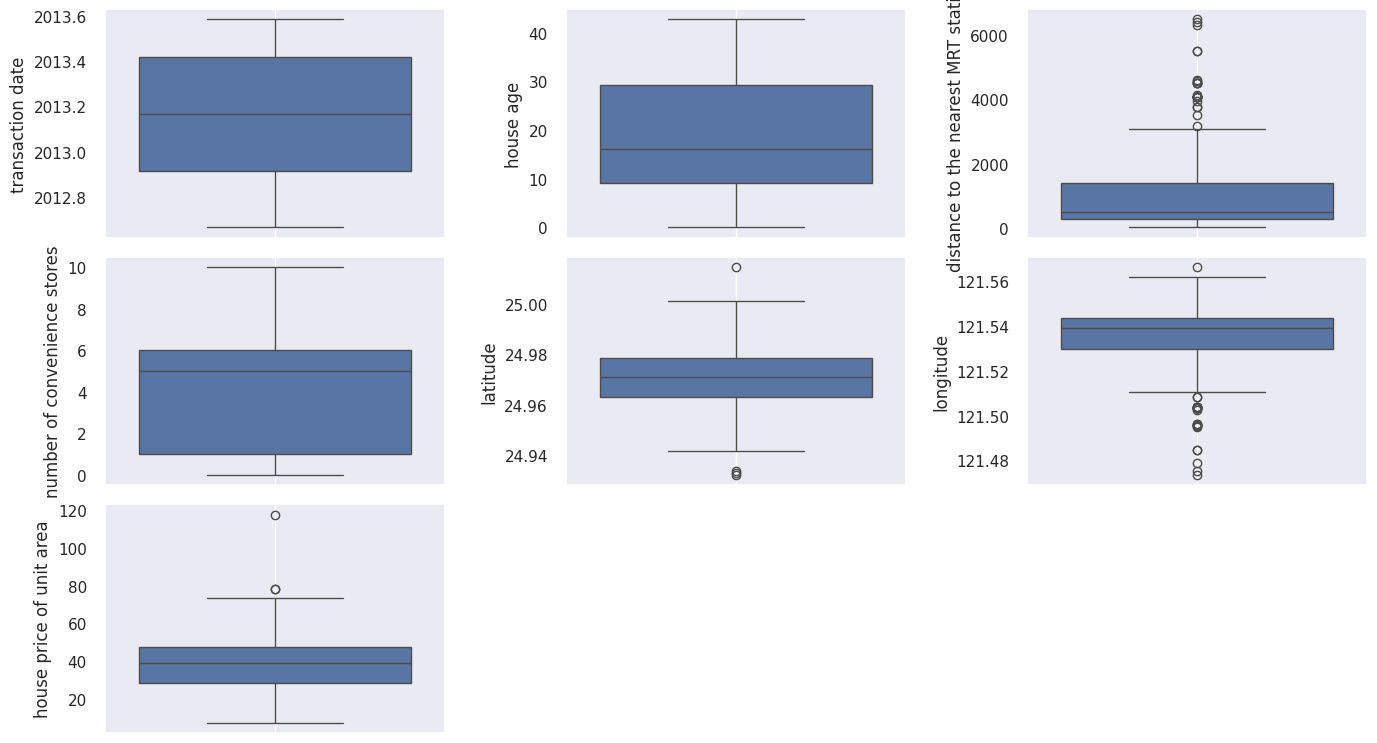

In [145]:
# Check outliers
# Boxplot
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(train_data):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=train_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

Мы видим, что есть очевидные отклонения в:
* стоимость дома за единицу площади
* долгота
* расстояние до ближайшей станции метро

# Drop the outliers

In [67]:
train_data = train_data[train_data['house price of unit area']<80]
train_data = train_data[train_data['distance to the nearest MRT station']<3000]
train_data = train_data[train_data['longitude']>121.50]

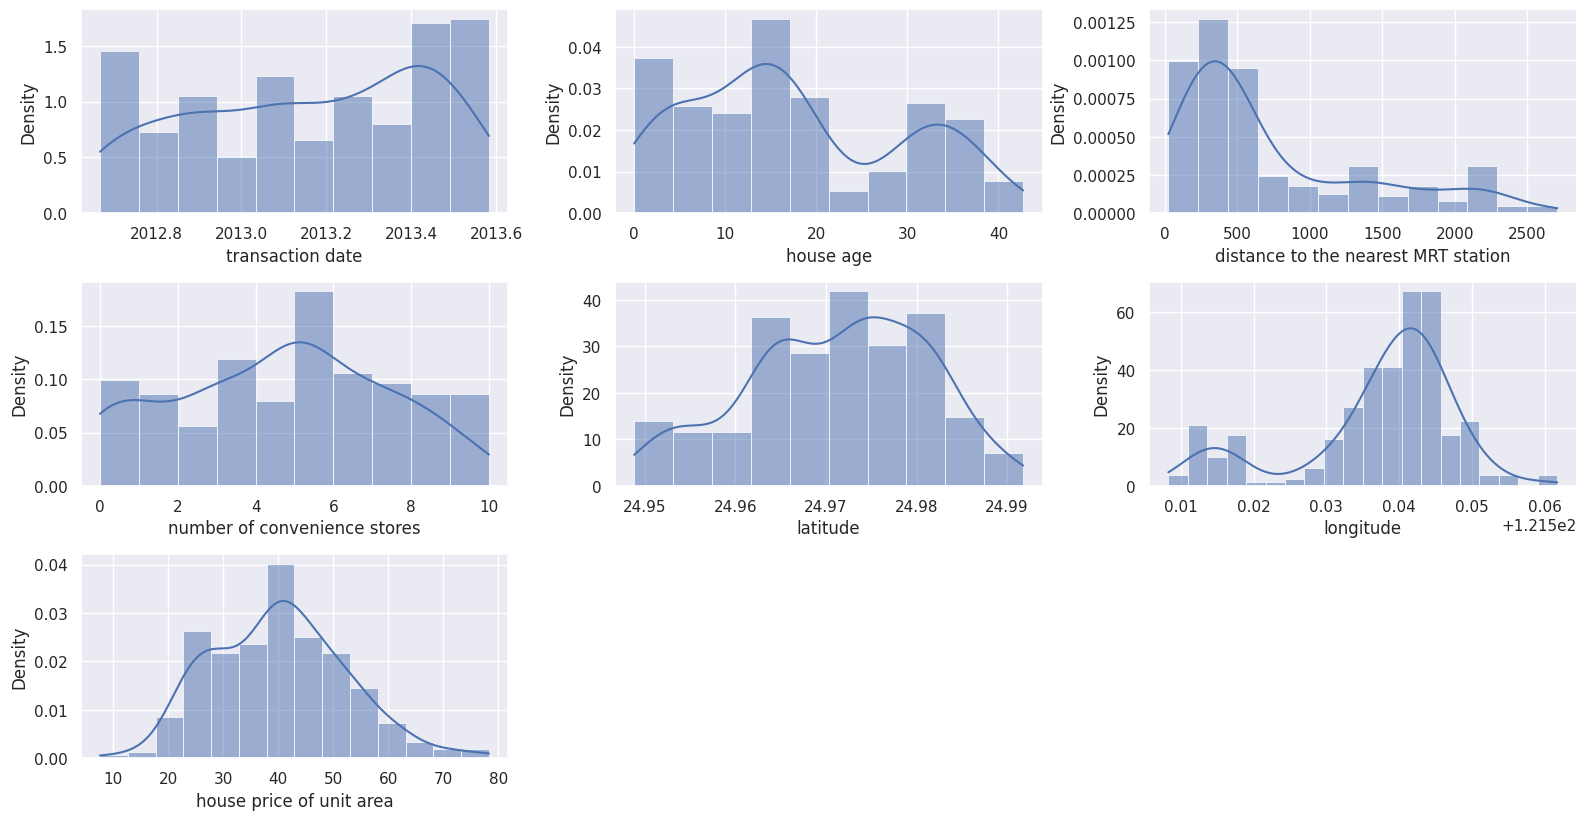

In [12]:
# Check outliers
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(train_data):
    plt.subplot(6,3,index+1)
    sns.histplot(train_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

# Check the correlation

In [13]:
# Corr to price of unit area
numeric_train = train_data
correlation = numeric_train.corr()
correlation[['house price of unit area']].sort_values(['house price of unit area'], ascending=False)

,house price of unit area
house price of unit area,1.000000
number of convenience stores,0.549931
latitude,0.442652
longitude,0.358851
transaction date,0.104169
house age,-0.197057
distance to the nearest MRT station,-0.684065


Количество магазинов повседневного спроса умеренно коррелирует с ценой за единицу площади, тогда как расстояние до ближайшей станции метро коррелирует отрицательно.


Корреляция — это не зависимость. Если две переменные коррелируют друг с другом — это еще не значит, что между ними есть причинно-следственная связь. Причины корреляции нужно исследовать отдельно — чтобы понять, как именно могут быть связаны показатели.


<Axes: >

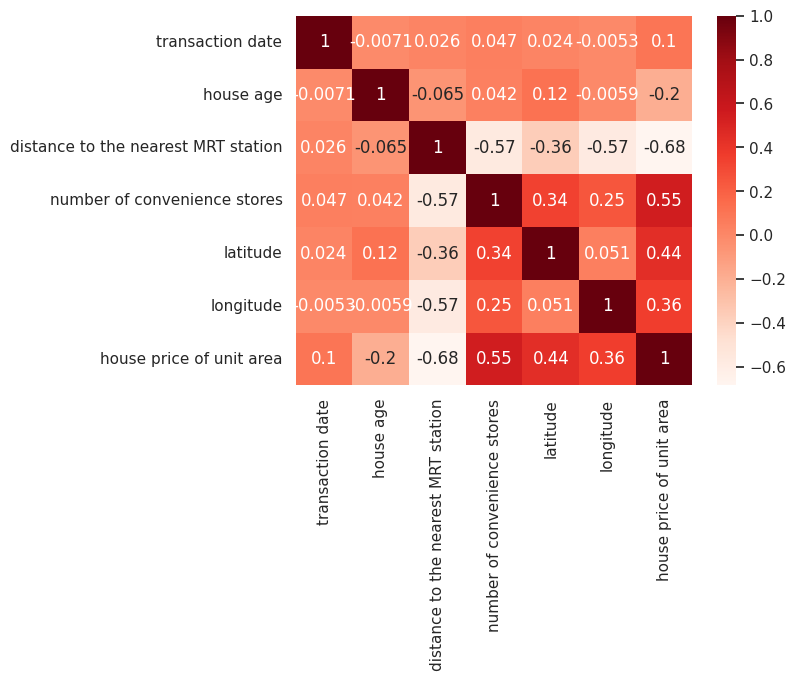

In [14]:
sns.heatmap(train_data.corr(), annot=True,cmap='Reds')

#### ✔️ Linear Regression

In [15]:
X=df.drop('house price of unit area', axis=1)

y=df['house price of unit area']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [17]:
model_linear = LinearRegression()

In [18]:
model_linear.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict on train data
pred_train_linear = model_linear.predict(X_train)

r2_train = r2_score(y_train, pred_train_linear)
mse_train = mean_squared_error(y_train, pred_train_linear)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, pred_train_linear)

In [20]:
# Predict on validation data
pred_val_linear = model_linear.predict(X_val)

r2_val = r2_score(y_val, pred_val_linear)
mse_val = mean_squared_error(y_val, pred_val_linear)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, pred_val_linear)

In [21]:
pd.DataFrame({'Validation':  [r2_val, mse_val, rmse_val, mae_val],
               'Training': [r2_train, mse_train, rmse_train, mae_train],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.589136,0.537138
MSE,70.661108,90.890643
RMSE,8.406016,9.533658
MAE,5.980761,6.549236


In [22]:
# Finally, predict on test data
pred_test_linear = model_linear.predict(X_test)

r2_test_linear = r2_score(y_test, pred_test_linear)
mse_test_linear = mean_squared_error(y_test, pred_test_linear)
rmse_test_linear = np.sqrt(mse_test_linear)
mae_test_linear = mean_absolute_error(y_test, pred_test_linear)

print('R2 Score: ', r2_test_linear)
print('MSE: ', mse_test_linear)
print('RMSE: ', rmse_test_linear)
print('MAE: ', mae_test_linear)

R2 Score:  0.7056980079861919
MSE:  44.67093779553573
RMSE:  6.683632081101991
MAE:  5.2732267449445045



#Preprocessing data
Convert transaction date to day, month and year columns

Scaling the data

In [23]:
# Concat to perform preprocessing and scaling
dfs = [train_data, test_data]
data = pd.concat(dfs)

In [69]:
df

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [24]:
def to_date(data):
    # STEP 1: Convert transaction date to day, month and year columns
    # Create date column with `transaction date` as a date
    data['date'] = pd.to_datetime(data['transaction date'], format='%Y')

    # Create year column
    data['year'] = pd.DatetimeIndex(data['date']).year

    # Create month column by extracting the decimal part of `transaction date` and multiplying it by 12
    data['month'] = data['transaction date'].apply(lambda x: math.modf(x)[0])
    data['month'] = data['month']*12

    # Create day column by extracting the decimal part of int
    data['day'] = data['month'].apply(lambda x: math.modf(x)[0])
    data['month'] = data['month'].apply(lambda x: math.modf(x)[1])
    # Convert month to int
    data['month'] = (data['month']).astype(int)

    # Multiply `day` column by 30 + 1 to convert it to days
    data['day'] = (data['day']*30+1).astype(int)

    # Drop unnecessary columns
    data = data.drop(['transaction date', 'date'], axis=1, inplace=True)

In [26]:
to_date(data)

In [27]:
data

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,year,month,day
No,,,,,,,,,
160,15.5,815.93140,4,24.97886,121.53464,37.4,2012,8,1
96,8.0,104.81010,5,24.96674,121.54067,51.8,2012,11,1
12,6.3,90.45606,9,24.97433,121.54310,58.1,2013,3,30
375,5.4,390.56840,5,24.97937,121.54245,49.5,2013,3,1
166,13.7,1236.56400,1,24.97694,121.55391,30.6,2012,11,1
...,...,...,...,...,...,...,...,...,...
323,12.9,187.48230,1,24.97388,121.52981,33.1,2013,0,1
120,16.6,289.32480,5,24.98203,121.54348,59.6,2013,6,1
246,7.5,639.61980,5,24.97258,121.54814,40.8,2013,5,1


# Feature Scaling

In [28]:
# Split the data into X and y
X=data.drop('house price of unit area',axis=1)
y=data['house price of unit area']

In [29]:
# Standardize features by removing the mean and scaling to unit variance.
# The standard score of a sample x is calculated as:
#       z = (x - u) / s
transformer = StandardScaler().fit(X)
X_prep = transformer.transform(X)

In [30]:
X_prep.shape

(384, 8)

In [31]:
# Polynomial Features
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform
poly_features = polynomial_converter.fit(X_prep)
poly_features = polynomial_converter.transform(X_prep)

poly_features.shape

(384, 44)

# Modeling

In [32]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

### ✔️ L2 Regularization - Ridge Regression¶

In [33]:
model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [34]:
# Predict on train data
pred_train_ridge = model_ridge.predict(X_train)

r2_train = r2_score(y_train, pred_train_ridge)
mse_train = mean_squared_error(y_train, pred_train_ridge)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, pred_train_ridge)

In [35]:
# Predict on validation data
pred_val_ridge = model_ridge.predict(X_val)

r2_val = r2_score(y_val, pred_val_ridge)
mse_val = mean_squared_error(y_val, pred_val_ridge)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, pred_val_ridge)

In [36]:
pd.DataFrame({'Validation':  [r2_val, mse_val, rmse_val, mae_val],
               'Training': [r2_train, mse_train, rmse_train, mae_train],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.600325,0.774585
MSE,57.414447,34.110226
RMSE,7.577232,5.840396
MAE,5.499518,4.472234


In [37]:
# Cross-validation method to evaluate model
model_ridge_cv = RidgeCV(alphas=(0.001, 0.01), scoring='neg_mean_absolute_error')

In [38]:
model_ridge_cv.fit(X_train, y_train)

print("alpha: ", model_ridge_cv.alpha_)

alpha:  0.01


In [39]:
# Predict on validation data
pred_val_ridge = model_ridge_cv.predict(X_val)

r2_val2 = r2_score(y_val, pred_val_ridge)
mse_val2 = mean_squared_error(y_val, pred_val_ridge)
rmse_val2 = np.sqrt(mse_val)
mae_val2 = mean_absolute_error(y_val, pred_val_ridge)

In [40]:
# Compare this model (validation 2) with the previous one (validation 1)
pd.DataFrame({'Validation 1':  [r2_val, mse_val, rmse_val, mae_val],
               'Validation 2': [r2_val2, mse_val2, rmse_val2, mae_val2],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation 1,Validation 2
R2,0.600325,0.623769
MSE,57.414447,54.046727
RMSE,7.577232,7.577232
MAE,5.499518,5.209371


In [41]:
# Finally, predict on test data
pred_test_ridge = model_ridge_cv.predict(X_test)

r2_test_ridge = r2_score(y_test, pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test, pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_val)
mae_test_ridge = mean_absolute_error(y_test, pred_test_ridge)

print('R2 Score: ', r2_test_ridge)
print('MSE: ', mse_test_ridge)
print('RMSE: ', rmse_test_ridge)
print('MAE: ', mae_test_ridge)

R2 Score:  0.693466284665567
MSE:  51.92609997540584
RMSE:  7.577232126940353
MAE:  5.462028591585554


### ✔️ L1 Regularization - Lasso Regression¶

In [42]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [43]:
# Predict on train data
pred_train_lasso = model_lasso.predict(X_train)

r2_train_lasso = r2_score(y_train, pred_train_lasso)
mse_train_lasso = mean_squared_error(y_train, pred_train_lasso)
rmse_train_lasso = np.sqrt(mse_train)
mae_train_lasso = mean_absolute_error(y_train, pred_train_lasso)

In [44]:
# Predict on validation data
pred_val_lasso = model_lasso.predict(X_val)

r2_val_lasso = r2_score(y_val, pred_val_lasso)
mse_val_lasso = mean_squared_error(y_val, pred_val_lasso)
rmse_val_lasso = np.sqrt(mse_val)
mae_val_lasso = mean_absolute_error(y_val, pred_val_lasso)

In [45]:
pd.DataFrame({'Validation':  [r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso],
               'Training': [r2_train_lasso, mse_train_lasso, rmse_train_lasso, mae_train_lasso],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.637893,0.772010
MSE,52.017775,34.499944
RMSE,7.577232,5.840396
MAE,5.185595,4.365759


In [46]:
# Cross-validation method to evaluate model
#model_lasso_cv = LassoCV(eps=0.01, n_alphas=50000, cv=10)
model_lasso_cv = LassoCV(eps=0.01, n_alphas=100, cv=10, max_iter=10000)

In [47]:
model_lasso_cv.fit(X_train, y_train)

print("alpha: ", model_lasso_cv.alpha_)

alpha:  0.1622182019083469


In [48]:
# Predict on validation data
pred_val_lasso2 = model_lasso_cv.predict(X_val)

r2_val2_lasso = r2_score(y_val, pred_val_lasso2)
mse_val2_lasso = mean_squared_error(y_val, pred_val_lasso2)
rmse_val2_lasso = np.sqrt(mse_val)
mae_val2_lasso = mean_absolute_error(y_val, pred_val_lasso2)

In [49]:
# Compare this model (validation 2) with the previous one (validation 1)
pd.DataFrame({'Validation 1':  [r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso],
               'Validation 2': [r2_val2_lasso, mse_val2_lasso, rmse_val2_lasso, mae_val2_lasso],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation 1,Validation 2
R2,0.637893,0.635305
MSE,52.017775,52.389482
RMSE,7.577232,7.577232
MAE,5.185595,5.209678


In [130]:
model_lasso_cv.coef_

array([-3.49187858, -7.5914135 ,  2.22945381,  2.56907502,  0.55603855,
        0.        ,  0.22079446,  0.53318031,  2.37866215,  0.25549898,
       -0.        , -0.0276687 , -0.52157607,  0.79356054, -0.        ,
        0.26680502,  0.35571105, -1.16320736, -1.81035921, -0.        ,
       -0.14864736, -0.        , -0.        , -0.        , -2.0862012 ,
        0.        ,  0.        ,  0.14623379,  0.        , -0.        ,
        0.        , -0.        , -0.37353163,  0.28420618, -0.        ,
        0.4046966 , -0.        ,  0.67476313, -0.        ,  1.65083189,
        0.        , -0.        , -0.        ,  0.        ])

In [50]:
# Finally, predict on test data
pred_test_lasso = model_lasso_cv.predict(X_test)

r2_test_lasso = r2_score(y_test, pred_test_lasso)
mse_test_lasso = mean_squared_error(y_test, pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_val)
mae_test_lasso = mean_absolute_error(y_test, pred_test_lasso)

print('R2 Score: ', r2_test_lasso)
print('MSE: ', mse_test_lasso)
print('RMSE: ', rmse_test_lasso)
print('MAE: ', mae_test_lasso)

R2 Score:  0.7277709705403466
MSE:  46.11496580239895
RMSE:  7.577232126940353
MAE:  5.102112417507632


### ✔️XGBRegressor

In [51]:
# Fit the model
model_xgbr = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 0, max_depth = 3)

model_xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
# Predict on train data
pred_train_xgbr = model_xgbr.predict(X_train)

r2_train_xgbr = r2_score(y_train, pred_train_xgbr)
mse_train_xgbr = mean_squared_error(y_train, pred_train_xgbr)
rmse_train_xgbr = np.sqrt(mse_train_xgbr)
mae_train_xgbr = mean_absolute_error(y_train, pred_train_xgbr)

In [53]:
# Predict on validation data
pred_val_xgbr = model_xgbr.predict(X_val)

r2_val_xgbr = r2_score(y_val, pred_val_xgbr)
mse_val_xgbr = mean_squared_error(y_val, pred_val_xgbr)
rmse_val_xgbr = np.sqrt(mse_val_xgbr)
mae_val_xgbr = mean_absolute_error(y_val, pred_val_xgbr)

In [54]:
pd.DataFrame({'Validation':  [r2_val_xgbr, mse_val_xgbr, rmse_val_xgbr, mae_val_xgbr],
               'Training': [r2_train_xgbr, mse_train_xgbr, rmse_train_xgbr, mae_train_xgbr],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.693785,0.900300
MSE,43.988684,15.086785
RMSE,6.632397,3.884171
MAE,4.881239,2.952029


In [55]:
# Finally, predict on test data
pred_test_xgbr = model_xgbr.predict(X_test)

r2_test_xgbr = r2_score(y_test, pred_test_xgbr)
mse_test_xgbr = mean_squared_error(y_test, pred_test_xgbr)
rmse_test_xgbr = np.sqrt(mse_test_xgbr)
mae_test_xgbr = mean_absolute_error(y_test, pred_test_xgbr)

print('R2 Score: ', r2_test_xgbr)
print('MSE: ', mse_test_xgbr)
print('RMSE: ', rmse_test_xgbr)
print('MAE: ', mae_test_xgbr)

R2 Score:  0.7920014457150022
MSE:  35.234472373647726
RMSE:  5.935863237444721
MAE:  4.295330761005352


#### Conclusion

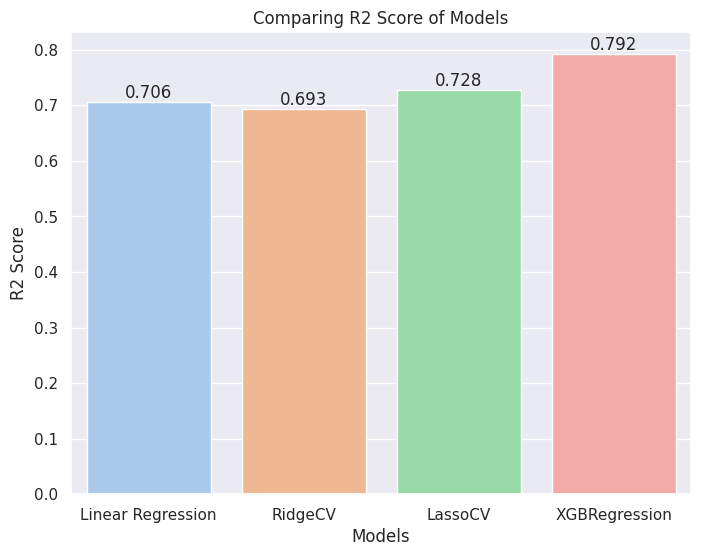

In [56]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_palette(palette = 'pastel')

models = ['Linear Regression', 'RidgeCV','LassoCV', 'XGBRegression']
r2 = [r2_test_linear, r2_test_ridge, r2_test_lasso, r2_test_xgbr]
ax = sns.barplot(x = models, y = r2, hue=models)
for bars in ax.containers:
  ax.bar_label(bars, fmt='%.3f')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparing R2 Score of Models');

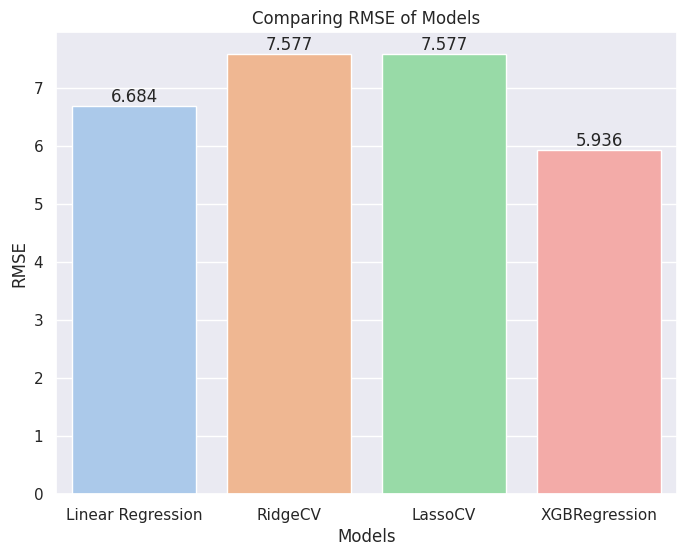

In [57]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_palette(palette = 'pastel')

rmse = [rmse_test_linear, rmse_test_ridge, rmse_test_lasso, rmse_test_xgbr]
ax = sns.barplot(x = models, y = rmse, hue=models)
for bars in ax.containers:
  ax.bar_label(bars, fmt='%.3f')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparing RMSE of Models');